In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
def plot_something(x, y, x_name, y_name, label, color, second, second_x, 
                    second_y, second_y_name, second_color, path, name):
    """Función que permite graficar cualquier metrica obtenida durante el entrenamiento."""
    fig, ax1 = plt.subplots(figsize=(14,7))

    for i in range(len(y)):
        aux_y = y[i]
        ax1.plot(x, aux_y, color=color[i], label=label[i])

    ax1.set_xlabel(x_name, fontsize='25', labelpad=20) #'Episodios'
    ax1.set_ylabel(y_name, fontsize='25', labelpad=20) #'Recompensa promedio'
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20) 

    if second:
        ax2 = ax1.twinx()

        ax2.set_ylabel(second_y_name, color=second_color, fontsize='25', labelpad=20)  
        ax2.plot(second_x, second_y, color=second_color)
        ax2.tick_params(axis='y', labelcolor=second_color, labelsize=20)

        legend_1 = ax1.legend(loc='upper left', shadow=True, fontsize='20')
        legend_1.get_frame().set_facecolor('white')
        legend_1.remove()
        ax2.add_artist(legend_1) 

        fig.tight_layout()
    
    else:
        legend_1 = ax1.legend(loc='upper left', shadow=True, fontsize='20')
        legend_1.get_frame().set_facecolor('white')


    plt.savefig(f'{path}{name}', bbox_inches='tight')
    plt.show() 

import os
import errno

def make_dir(file):
    try:
        os.mkdir(file)
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise

## DQN DefeatRoaches

In [148]:
# Experimento 1
import glob 

path = '../save_results/DQN/DefeatRoaches/2022-01-09 00-54-06.218781/'
files = glob.glob(path + '12000eps_DQN_checkpoint*.pkl')

epsilon = [1.0]
n_episodios = [0]

for file in files:
    reader = pd.read_pickle(file)
    epsilon.append(reader['epsilon'])
    n_episodios.append(reader['n_episodes'])

sorted_epsilon = sorted(epsilon, reverse=True)
sorted_n_episodios = sorted(n_episodios, reverse=False)

In [149]:
# Se carga ultimo file creado
filename = '12000eps_DQN_checkpoint12000_data.pkl'
battle_dqn = pd.read_pickle(path + filename)
battle_dqn.keys()

dict_keys(['loss', 'max_q', 'epsilon', 'reward', 'n_episodes'])

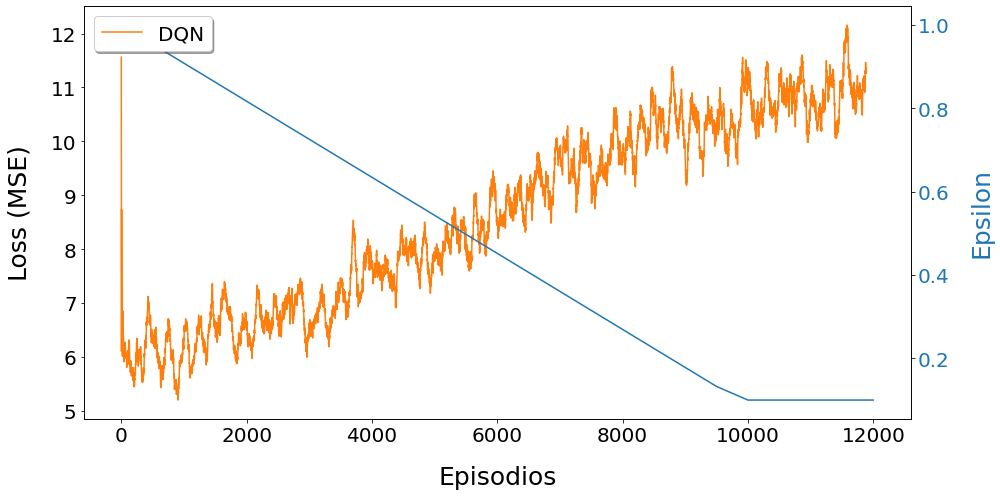

In [150]:
## Grafico de la perdida
x_name = 'Episodios'
x = list(range(0, len(battle_dqn['loss']))) 

y_name = 'Loss (MSE)'
mean_loss = np.empty(len(battle_dqn['loss']), dtype=object)
for t in range(len(battle_dqn['loss'])):
    mean_loss[t] = np.mean(battle_dqn['loss'][max(0, t-80):(t+1)])
mean_loss_list = [mean_loss.tolist()]

label = ['DQN']
color = ['tab:orange']

second = True
second_x = list(range(0, len(battle_dqn['loss'])+125, 500))
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'DefeatRoaches'
make_dir(path_plot)
name = '/plotLoss_DQN.png'

plot_something(x, mean_loss_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

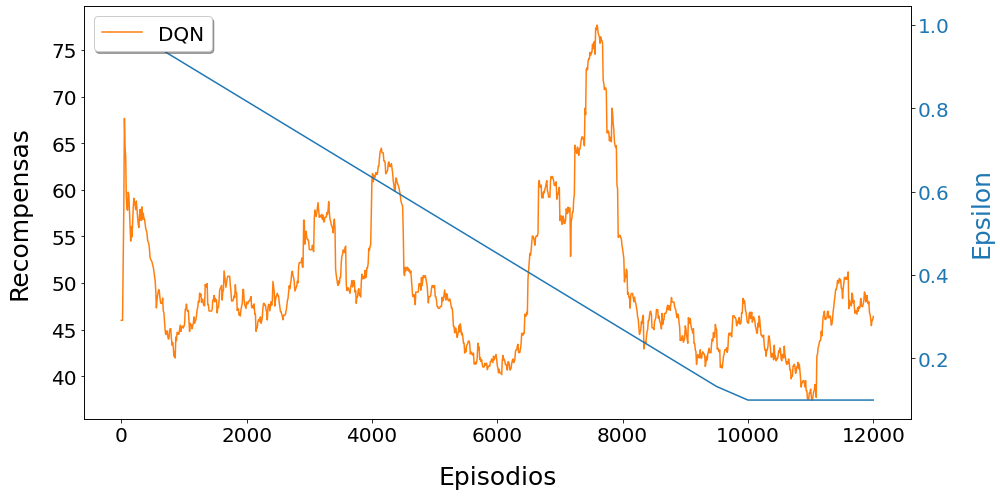

In [151]:
## Grafico de la recompensa
x_name = 'Episodios'
x = list(range(0, len(battle_dqn['reward']) * 10 - 9, 10))

y_name = 'Recompensas'
mean_reward = np.empty(len(battle_dqn['reward']), dtype=object)
for t in range(len(battle_dqn['reward'])):
    mean_reward[t] = np.mean(battle_dqn['reward'][max(0, t-50):(t+1)])
mean_reward_list = [mean_reward.tolist()]

label = ['DQN']
color = ['tab:orange']

second = True
second_x = sorted_n_episodios
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'DefeatRoaches'
make_dir(path_plot)
name = '/plotRewards_DQN.png'

plot_something(x, mean_reward_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

## Dueling DQN DefeatRoaches

In [154]:
# Experimento 2
import glob 

path = '../save_results/D3QN/DefeatRoaches/2022-01-09 03-18-08.423361/'
files = glob.glob(path + '12000eps_D3QN_checkpoint*.pkl')

epsilon = [1.0]
n_episodios = [0]

for file in files:
    reader = pd.read_pickle(file)
    epsilon.append(reader['epsilon'])
    n_episodios.append(reader['n_episodes'])

sorted_epsilon = sorted(epsilon, reverse=True)
sorted_n_episodios = sorted(n_episodios, reverse=False)

In [155]:
# Se carga ultimo file creado
filename = '12000eps_D3QN_checkpoint12000_data.pkl'
battle_d3qn = pd.read_pickle(path + filename)
battle_d3qn.keys()

dict_keys(['loss', 'max_q', 'epsilon', 'reward', 'n_episodes'])

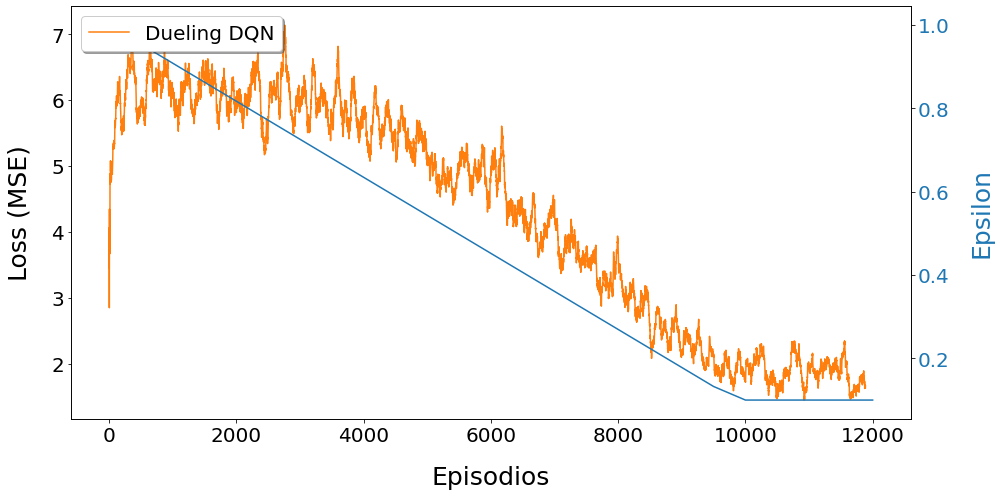

In [156]:
## Grafico de la perdida
x_name = 'Episodios'
x = list(range(0, len(battle_d3qn['loss']))) 

y_name = 'Loss (MSE)'
mean_loss = np.empty(len(battle_d3qn['loss']), dtype=object)
for t in range(len(battle_d3qn['loss'])):
    mean_loss[t] = np.mean(battle_d3qn['loss'][max(0, t-80):(t+1)])
mean_loss_list = [mean_loss.tolist()]

label = ['Dueling DQN']
color = ['tab:orange']

second = True
second_x = list(range(0, len(battle_d3qn['loss'])+125, 500))
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'DefeatRoaches'
make_dir(path_plot)
name = '/plotLoss_D3QN.png'

plot_something(x, mean_loss_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

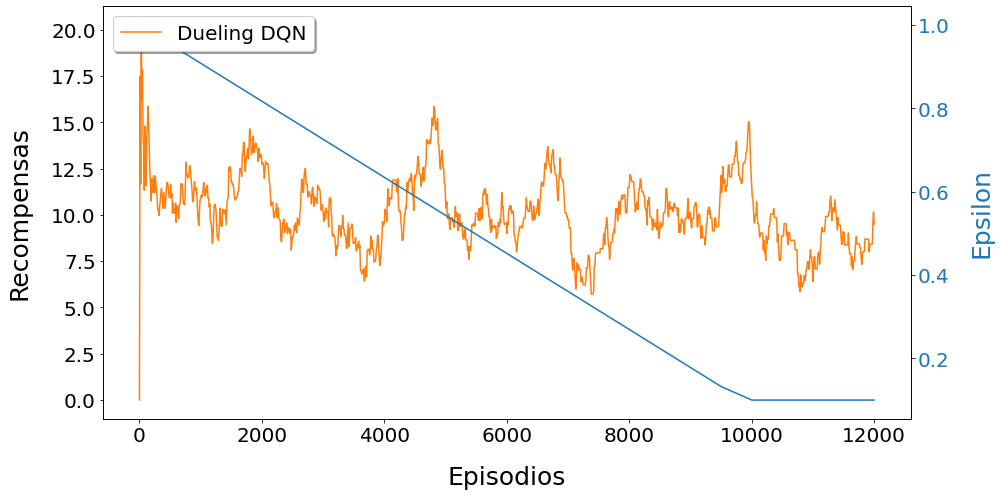

In [157]:
## Grafico de la recompensa
x_name = 'Episodios'
x = list(range(0, len(battle_d3qn['reward']) * 10 - 9, 10))

y_name = 'Recompensas'
mean_reward = np.empty(len(battle_d3qn['reward']), dtype=object)
for t in range(len(battle_d3qn['reward'])):
    mean_reward[t] = np.mean(battle_d3qn['reward'][max(0, t-50):(t+1)])
mean_reward_list = [mean_reward.tolist()]

label = ['Dueling DQN']
color = ['tab:orange']

second = True
second_x = sorted_n_episodios
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'DefeatRoaches'
make_dir(path_plot)
name = '/plotRewards_D3QN.png'

plot_something(x, mean_reward_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

In [158]:
import joblib

file_job = path + 'D3QN_evaluation_reward.joblib'
loaded_rewards = joblib.load(file_job)
episodes_job = list(range(0, (len(loaded_rewards))*10, 10))
len(episodes_job)

1201

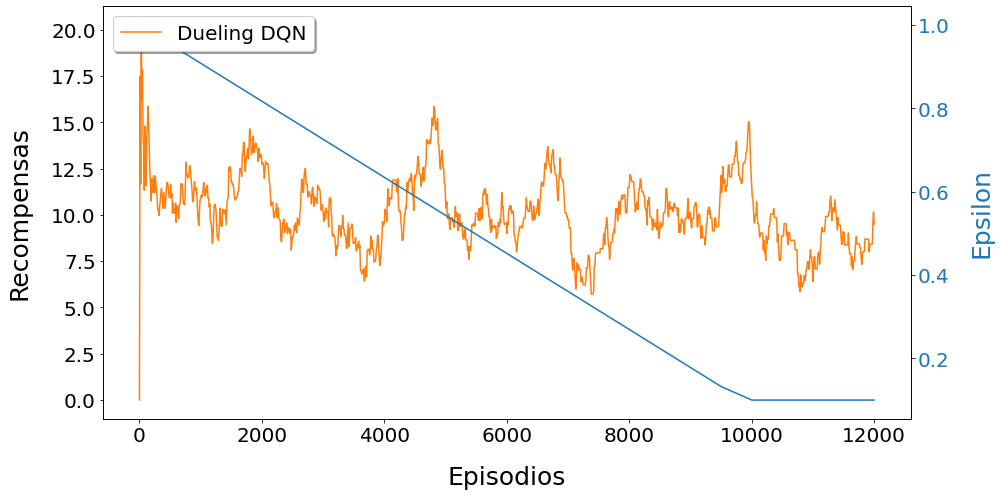

In [159]:
## Grafico de la recompensa
x_name = 'Episodios'
episodes_job = list(range(0, (len(loaded_rewards))*10, 10))

y_name = 'Recompensas'
mean_reward = np.empty(len(loaded_rewards), dtype=object)
for t in range(len(loaded_rewards)):
    mean_reward[t] = np.mean(loaded_rewards[max(0, t-50):(t+1)])
mean_reward_list = [mean_reward.tolist()]

label = ['Dueling DQN']
color = ['tab:orange']

second = True
second_x = sorted_n_episodios
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'DefeatRoaches'
make_dir(path_plot)
name = '/plotRewards_joblib_D3QN.png'

plot_something(episodes_job, mean_reward_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

## DQN MoveToBeacon

In [160]:
# Experimento 1
import glob 

path = '../save_results/DQN/MoveToBeacon/2022-01-09 00-46-57.965232/'
files = glob.glob(path + '8000eps_DQN_checkpoint*.pkl')

epsilon = [1.0]
n_episodios = [0]

for file in files:
    reader = pd.read_pickle(file)
    epsilon.append(reader['epsilon'])
    n_episodios.append(reader['n_episodes'])

sorted_epsilon = sorted(epsilon, reverse=True)
sorted_n_episodios = sorted(n_episodios, reverse=False)

In [161]:
# Se carga ultimo file creado
filename = '8000eps_DQN_checkpoint8000_data.pkl'
beacon_dqn = pd.read_pickle(path + filename)
beacon_dqn.keys()

dict_keys(['loss', 'max_q', 'epsilon', 'reward', 'n_episodes'])

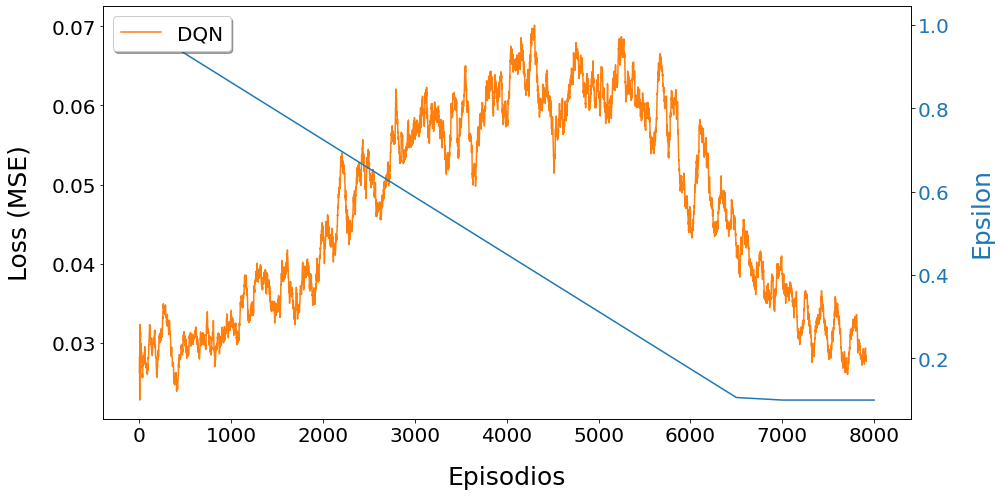

In [162]:
## Grafico de la perdida
x_name = 'Episodios'
x = list(range(0, len(beacon_dqn['loss']))) 

y_name = 'Loss (MSE)'
mean_loss = np.empty(len(beacon_dqn['loss']), dtype=object)
for t in range(len(beacon_dqn['loss'])):
    mean_loss[t] = np.mean(beacon_dqn['loss'][max(0, t-80):(t+1)])
mean_loss_list = [mean_loss.tolist()]

label = ['DQN']
color = ['tab:orange']

second = True
second_x = list(range(0, len(beacon_dqn['loss'])+125, 500))
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'MoveToBeacon'
make_dir(path_plot)
name = '/plotLoss_DQN.png'

plot_something(x, mean_loss_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

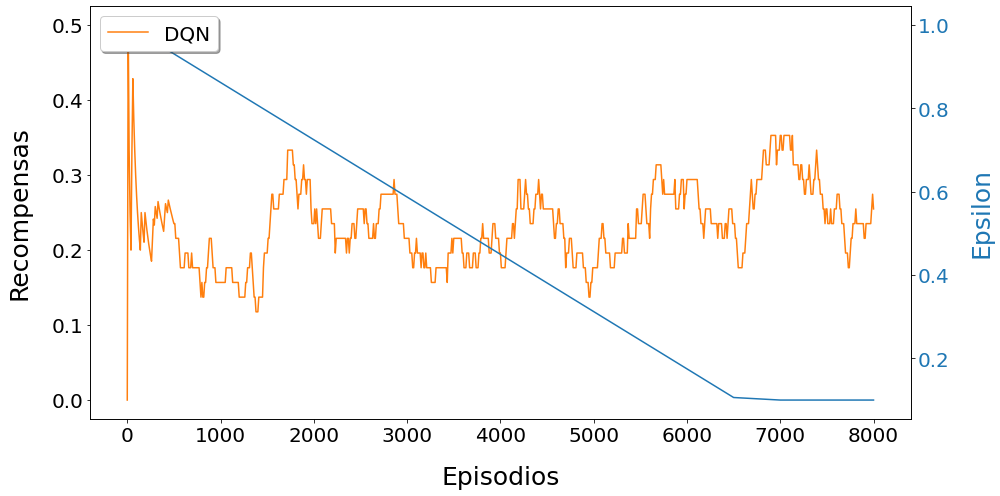

In [163]:
## Grafico de la recompensa
x_name = 'Episodios'
x = list(range(0, len(beacon_dqn['reward']) * 10 - 9, 10))

y_name = 'Recompensas'
mean_reward = np.empty(len(beacon_dqn['reward']), dtype=object)
for t in range(len(beacon_dqn['reward'])):
    mean_reward[t] = np.mean(beacon_dqn['reward'][max(0, t-50):(t+1)])
mean_reward_list = [mean_reward.tolist()]

label = ['DQN']
color = ['tab:orange']

second = True
second_x = sorted_n_episodios
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'MoveToBeacon'
make_dir(path_plot)
name = '/plotRewards_DQN.png'

plot_something(x, mean_reward_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

## Dueling DQN MoveToBeacon

In [164]:
# Experimento 2
import glob 

path = '../save_results/D3QN/MoveToBeacon/2022-01-09 10-34-36.078925/'
files = glob.glob(path + '8000eps_D3QN_checkpoint*.pkl')

epsilon = [1.0]
n_episodios = [0]

for file in files:
    reader = pd.read_pickle(file)
    epsilon.append(reader['epsilon'])
    n_episodios.append(reader['n_episodes'])

sorted_epsilon = sorted(epsilon, reverse=True)
sorted_n_episodios = sorted(n_episodios, reverse=False)

In [165]:
# Se carga ultimo file creado
filename = '8000eps_D3QN_checkpoint8000_data.pkl'
beacon_d3qn = pd.read_pickle(path + filename)
beacon_d3qn.keys()

dict_keys(['loss', 'max_q', 'epsilon', 'reward', 'n_episodes'])

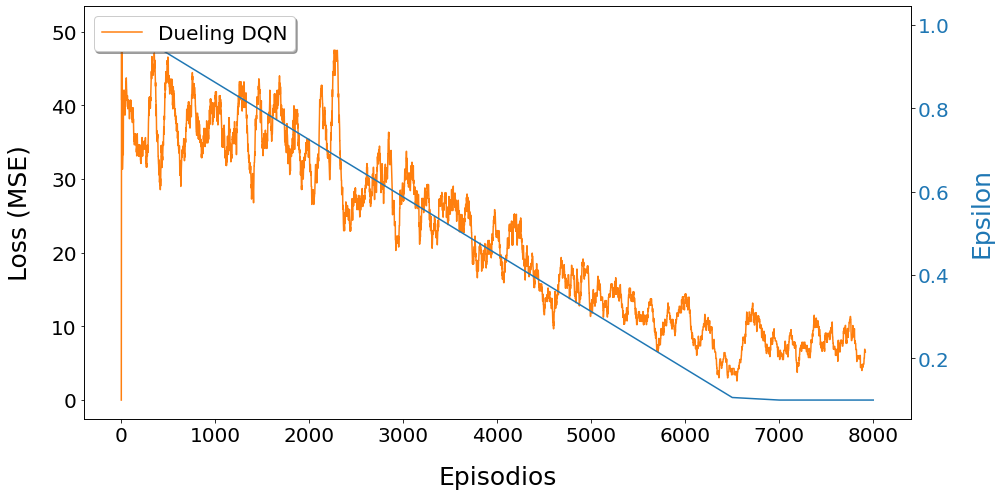

In [166]:
## Grafico de la perdida
x_name = 'Episodios'
x = list(range(0, len(beacon_d3qn['loss']))) 

y_name = 'Loss (MSE)'
mean_loss = np.empty(len(beacon_d3qn['loss']), dtype=object)
for t in range(len(beacon_d3qn['loss'])):
    mean_loss[t] = np.mean(beacon_d3qn['loss'][max(0, t-80):(t+1)])
mean_loss_list = [mean_loss.tolist()]

label = ['Dueling DQN']
color = ['tab:orange']

second = True
second_x = list(range(0, len(beacon_d3qn['loss'])+125, 500))
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'MoveToBeacon'
make_dir(path_plot)
name = '/plotLoss_D3QN.png'

plot_something(x, mean_loss_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

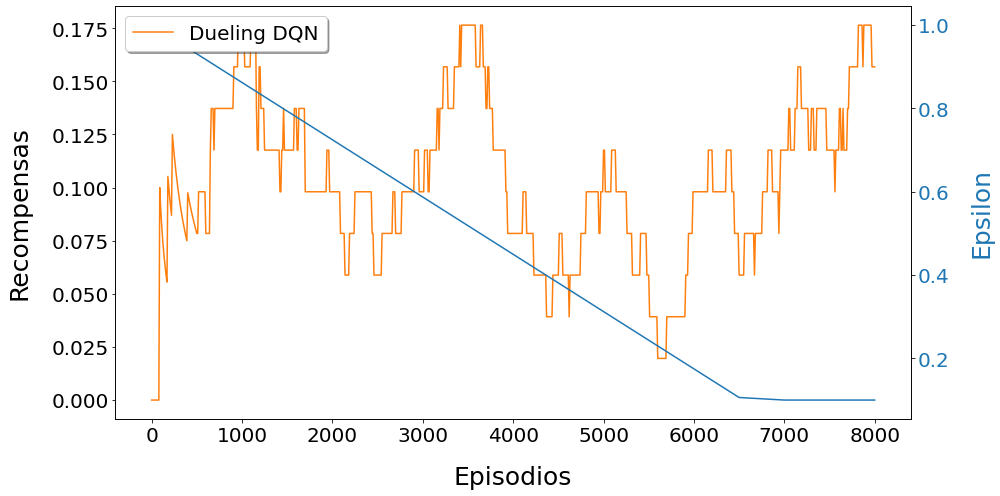

In [167]:
## Grafico de la recompensa
x_name = 'Episodios'
x = list(range(0, len(beacon_d3qn['reward']) * 10 - 9, 10))

y_name = 'Recompensas'
mean_reward = np.empty(len(beacon_d3qn['reward']), dtype=object)
for t in range(len(beacon_d3qn['reward'])):
    mean_reward[t] = np.mean(beacon_d3qn['reward'][max(0, t-50):(t+1)])
mean_reward_list = [mean_reward.tolist()]

label = ['Dueling DQN']
color = ['tab:orange']

second = True
second_x = sorted_n_episodios
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'MoveToBeacon'
make_dir(path_plot)
name = '/plotRewards_D3QN.png'

plot_something(x, mean_reward_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

## Best Experimento MoveToBeacon

In [182]:
# Experimento best
import glob 

path = '../save_results/DQN/MoveToBeacon/2022-08-28 07-34-36.078925/'
files = glob.glob(path + '10000eps_Beacon_checkpoint*.pkl')

epsilon = [0.9]
n_episodios = [0]

for file in files:
    reader = pd.read_pickle(file)
    epsilon.append(reader['epsilon'])
    n_episodios.append(reader['n_episodes'])

sorted_epsilon = sorted(epsilon, reverse=True)
sorted_n_episodios = sorted(n_episodios, reverse=False)

In [183]:
filename = '10000eps_Beacon_checkpoint9000_data.pkl'
beacon_best = pd.read_pickle(path + filename)
beacon_best.keys()

dict_keys(['loss', 'max_q', 'epsilon', 'reward', 'n_episodes'])

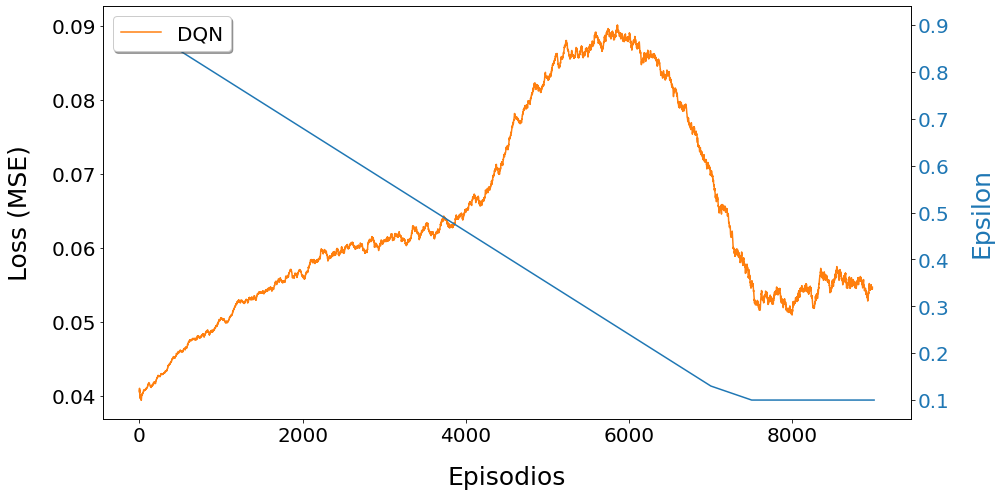

In [184]:
x_name = 'Episodios'
x = list(range(0, len(beacon_best['loss']))) 

y_name = 'Loss (MSE)'
mean_loss = np.empty(len(beacon_best['loss']), dtype=object)
for t in range(len(beacon_best['loss'])):
    mean_loss[t] = np.mean(beacon_best['loss'][max(0, t-80):(t+1)])
mean_loss_list = [mean_loss.tolist()]

label = ['DQN']
color = ['tab:orange']

second = True
second_x = list(range(0, len(beacon_best['loss'])+63, 500))
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'MoveToBeacon'
make_dir(path_plot)
name = '/plotLoss_bestDQN.png'

plot_something(x, mean_loss_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)

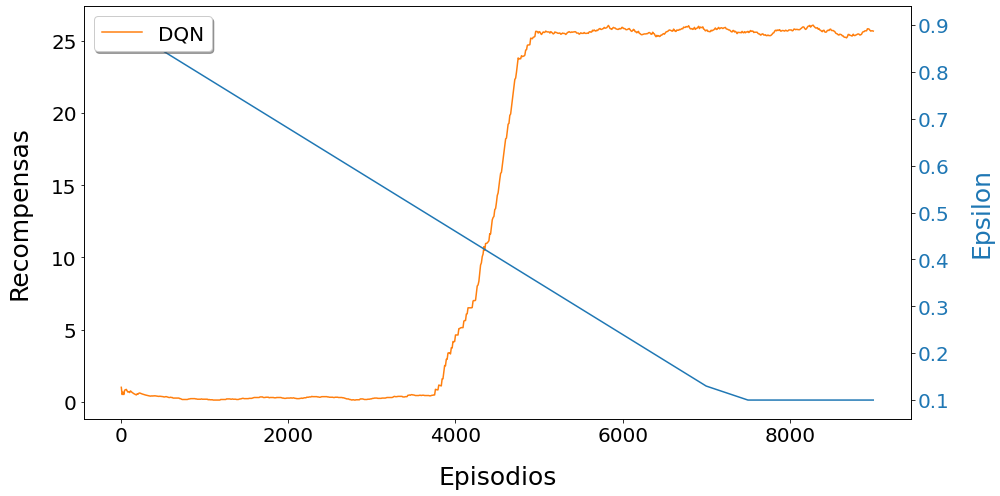

In [185]:
x_name = 'Episodios'
x = list(range(0, len(beacon_best['reward']) * 10 - 9, 10))

y_name = 'Recompensas'
mean_reward = np.empty(len(beacon_best['reward']), dtype=object)
for t in range(len(beacon_best['reward'])):
    mean_reward[t] = np.mean(beacon_best['reward'][max(0, t-50):(t+1)])
mean_reward_list = [mean_reward.tolist()]

label = ['DQN']
color = ['tab:orange']

second = True
second_x = sorted_n_episodios
second_y = sorted_epsilon
second_y_name = 'Epsilon'
second_color = 'tab:blue'

path_plot = 'MoveToBeacon'
make_dir(path_plot)
name = '/plotRewards_bestDQN.png'

plot_something(x, mean_reward_list, x_name, y_name, label, color, second, second_x,
            second_y, second_y_name, second_color, path_plot, name)